In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_avocados = pd.read_csv(r'C:\Users\abraz\OneDrive\Área de Trabalho\avocado_price_prediction\avocados_tratado.csv')
df_avocados = df_avocados.drop(columns=["Unnamed: 0"])

df_avocados.head()

,Date,AveragePrice,Total_Volume,Small_Hass,Large_Hass,XLarge_Hass,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.41,2604.25,220.61,23.64,0.00,2360.00,2360.00,0.00,0.0,organic,2015,NewOrleansMobile
2,2015-01-04,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,44329.03,6468.53,0.0,conventional,2015,Charlotte
3,2015-01-04,1.84,3966.00,244.34,2700.02,76.21,945.43,838.34,107.09,0.0,organic,2015,Nashville
4,2015-01-04,1.82,2288.44,1438.04,53.73,0.00,796.67,796.67,0.00,0.0,organic,2015,MiamiFtLauderdale


# EDA

Informações que quero obter nesta etapa:
1. Descrição dos dados
2. Informações dos dados.
3. Visualização.
    1. Distribuição de preço.
    2. Distribuição do volume.
    3. Preço médio do abacate por cidade.
    4. Preço médio do abacate pelo tempo.
    5. Preço médio por tipo de abacate
    6. Contagem dos anos.
    7. Matriz de correlação.

## Informação dos dados.

In [4]:
df_avocados.Date = pd.to_datetime(df_avocados.Date)

df_avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21755 entries, 0 to 21754
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21755 non-null  datetime64[ns]
 1   AveragePrice  21755 non-null  float64       
 2   Total_Volume  21755 non-null  float64       
 3   Small_Hass    21755 non-null  float64       
 4   Large_Hass    21755 non-null  float64       
 5   XLarge_Hass   21755 non-null  float64       
 6   Total_Bags    21755 non-null  float64       
 7   Small_Bags    21755 non-null  float64       
 8   Large_Bags    21755 non-null  float64       
 9   XLarge_Bags   21755 non-null  float64       
 10  type          21755 non-null  object        
 11  year          21755 non-null  int64         
 12  region        21755 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.2+ MB


## Descrição dos dados.


In [5]:
df_avocados.describe()

,AveragePrice,Total_Volume,Small_Hass,Large_Hass,XLarge_Hass,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,21755.000000,2.175500e+04,2.175500e+04,2.175500e+04,21755.000000,2.175500e+04,2.175500e+04,2.175500e+04,21755.000000,21755.000000
mean,1.402123,2.636959e+05,8.467897e+04,8.190905e+04,6894.693025,9.018837e+04,6.406715e+04,2.459562e+04,1525.594416,2016.956608
std,0.393671,5.551905e+05,2.265567e+05,1.783065e+05,20806.881751,2.015256e+05,1.579755e+05,6.543499e+04,9223.862122,1.406604
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.035185e+04,4.593150e+02,1.910825e+03,0.000000,5.599340e+03,3.268210e+03,9.814000e+01,0.000000,2016.000000
50%,1.360000,6.933977e+04,5.058040e+03,1.374141e+04,86.000000,2.892515e+04,2.016146e+04,2.403410e+03,0.000000,2017.000000
75%,1.640000,3.362519e+05,8.018551e+04,8.885265e+04,3159.150000,9.847557e+04,7.408667e+04,1.848190e+04,176.835000,2018.000000
max,3.250000,2.539490e+07,9.153159e+06,8.354516e+06,417270.700000,7.528927e+06,5.513112e+06,1.976739e+06,408007.910000,2019.000000


## Visualização.

### Distribuição de preço.

Text(0.5, 0, 'Preço médio.')

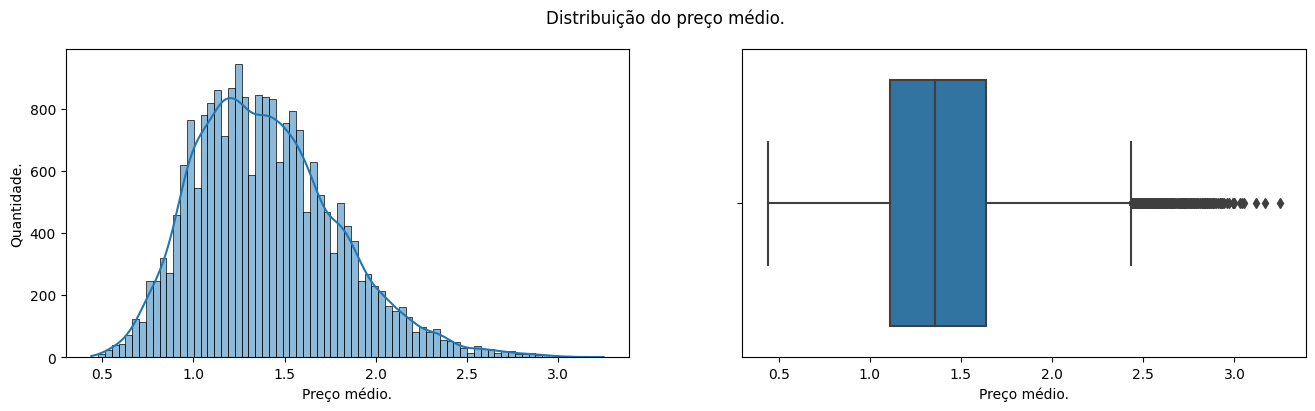

In [13]:
fig, axes = plt.subplots(1,2, figsize=(16,4))

x = df_avocados.AveragePrice

fig.suptitle('Distribuição do preço médio.')

sns.histplot(ax = axes[0], data = df_avocados, x=x, kde=True)
axes[0].set_ylabel("Quantidade.")
axes[0].set_xlabel("Preço médio.")


sns.boxplot(ax = axes[1], data = df_avocados, x=x,)
axes[1].set_xlabel("Preço médio.")


Podemos observar que existem muitos outlier na distribuição de preço médio.

### Distribuição do volume.

Text(0.5, 0, 'Volume total.')

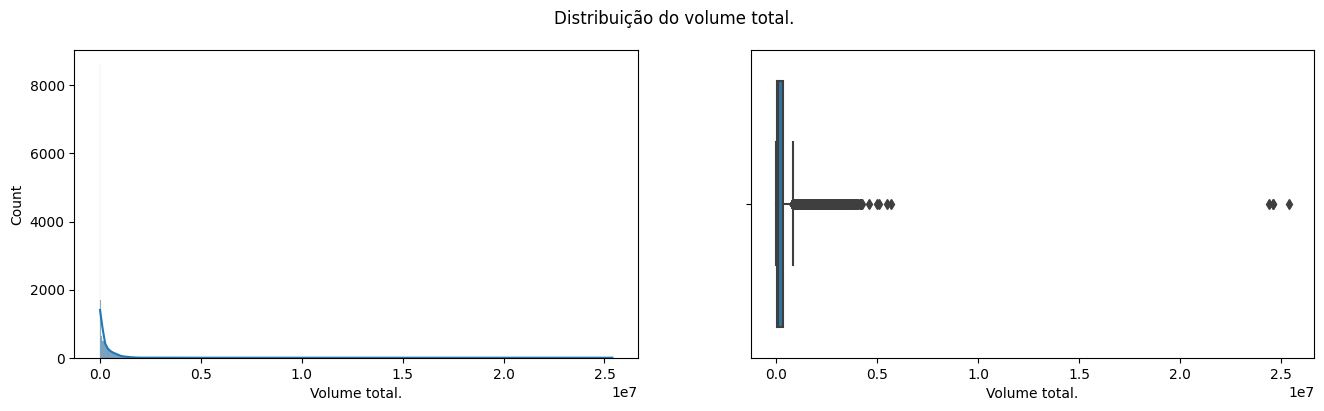

In [14]:
x = df_avocados.Total_Volume
fig, axes = plt.subplots(1,2, figsize=(16,4))


fig.suptitle('Distribuição do volume total.')

sns.histplot(ax = axes[0], data = df_avocados, x=x, kde=True)
axes[0].set_xlabel("Volume total.")


sns.boxplot(ax = axes[1], data = df_avocados, x=x,)
axes[1].set_xlabel("Volume total.")

Na categoria volume existe uma quantidade grande de outliers.

### Preço por cidade.

In [8]:
grp_price_region = df_avocados.groupby(['region']).agg(preco = ('AveragePrice','mean'))
grp_price_region = grp_price_region.sort_values(by='preco', ascending=False)
grp_price_region.head()

,preco
region,
SanFrancisco,1.790672
HartfordSpringfield,1.772905
Sacramento,1.607233
Charlotte,1.588972
RaleighGreensboro,1.577194


[]

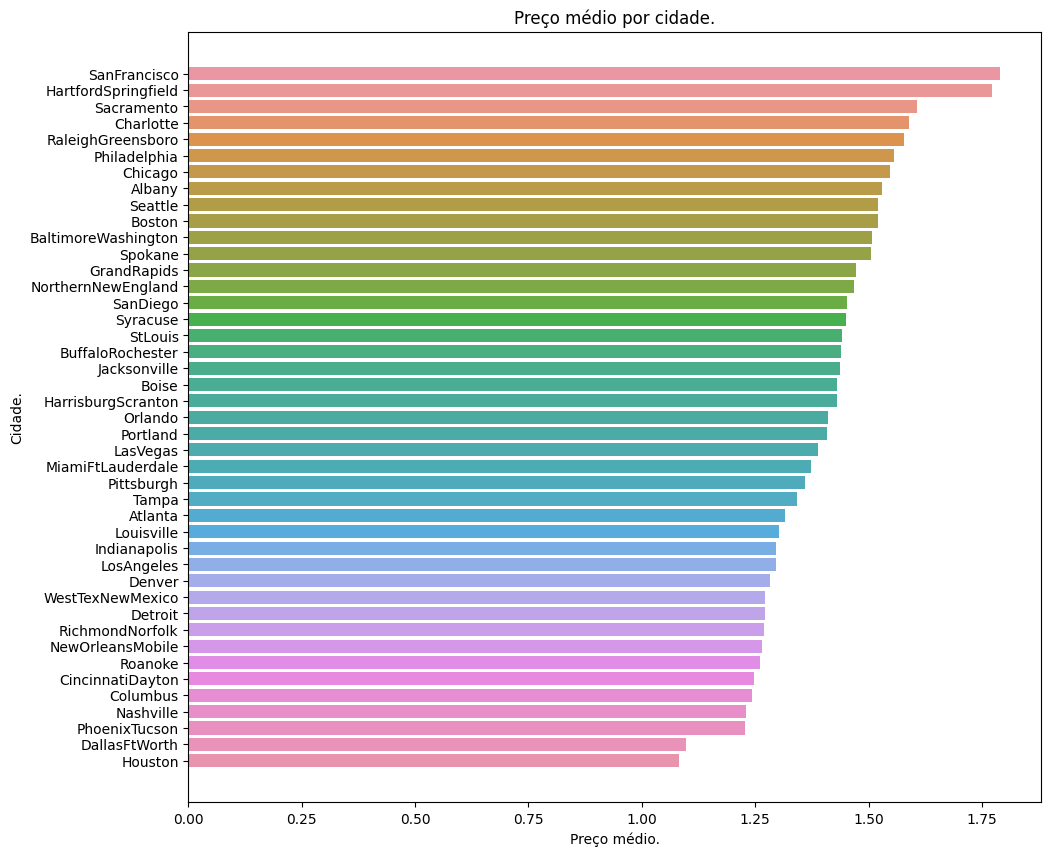

In [9]:
plt.figure(figsize=(11,10))

x = grp_price_region.preco
y = grp_price_region.index

sns.barplot(df_avocados, x=x, y=y)

plt.xlabel('Preço médio.')
plt.ylabel('Cidade.')
plt.title('Preço médio por cidade.')
plt.plot()

### Preço médio do abacate por tempo.

Text(0.5, 1.0, 'Preço médio do abacate por ano.')

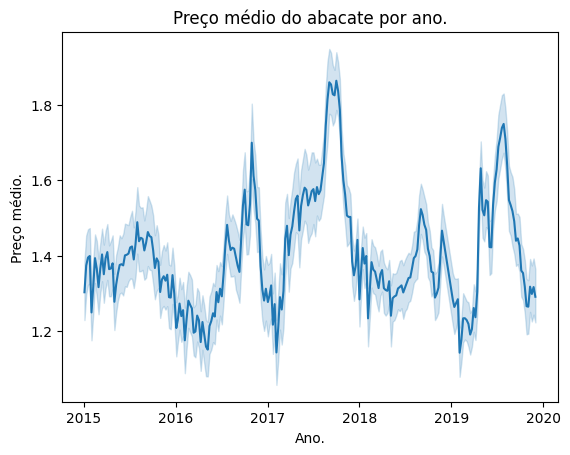

In [10]:
x = df_avocados.Date
y = df_avocados.AveragePrice

sns.lineplot(data=df_avocados, x=x, y=y)
plt.xlabel("Ano.")
plt.ylabel("Preço médio.")
plt.title('Preço médio do abacate por ano.')

[]

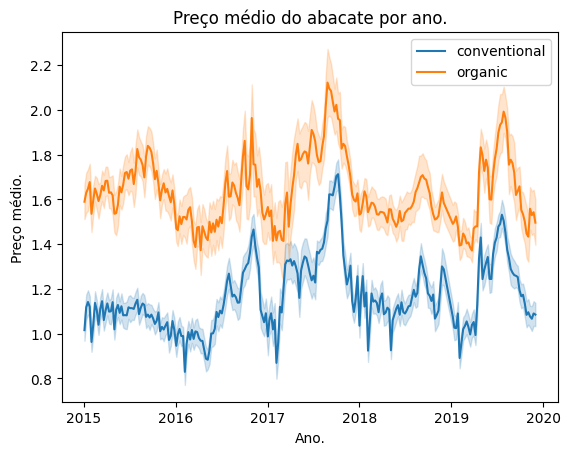

In [11]:
x = df_avocados.Date
y = df_avocados.AveragePrice

sns.lineplot(data=df_avocados, x=x, y=y, hue='type')

plt.xlabel("Ano.")
plt.ylabel("Preço médio.")
plt.title('Preço médio do abacate por ano.')
plt.legend()

plt.plot()

Podemos observar que o preço médio do abacate convencional é superior para todo o período análisado, porém as variações dos preço seguem a mesma tendência. Existe um evento que chama atenção, ele ocorre entro os anos de 2017 e 2018. Vou investigar melhor a causa desse evento.

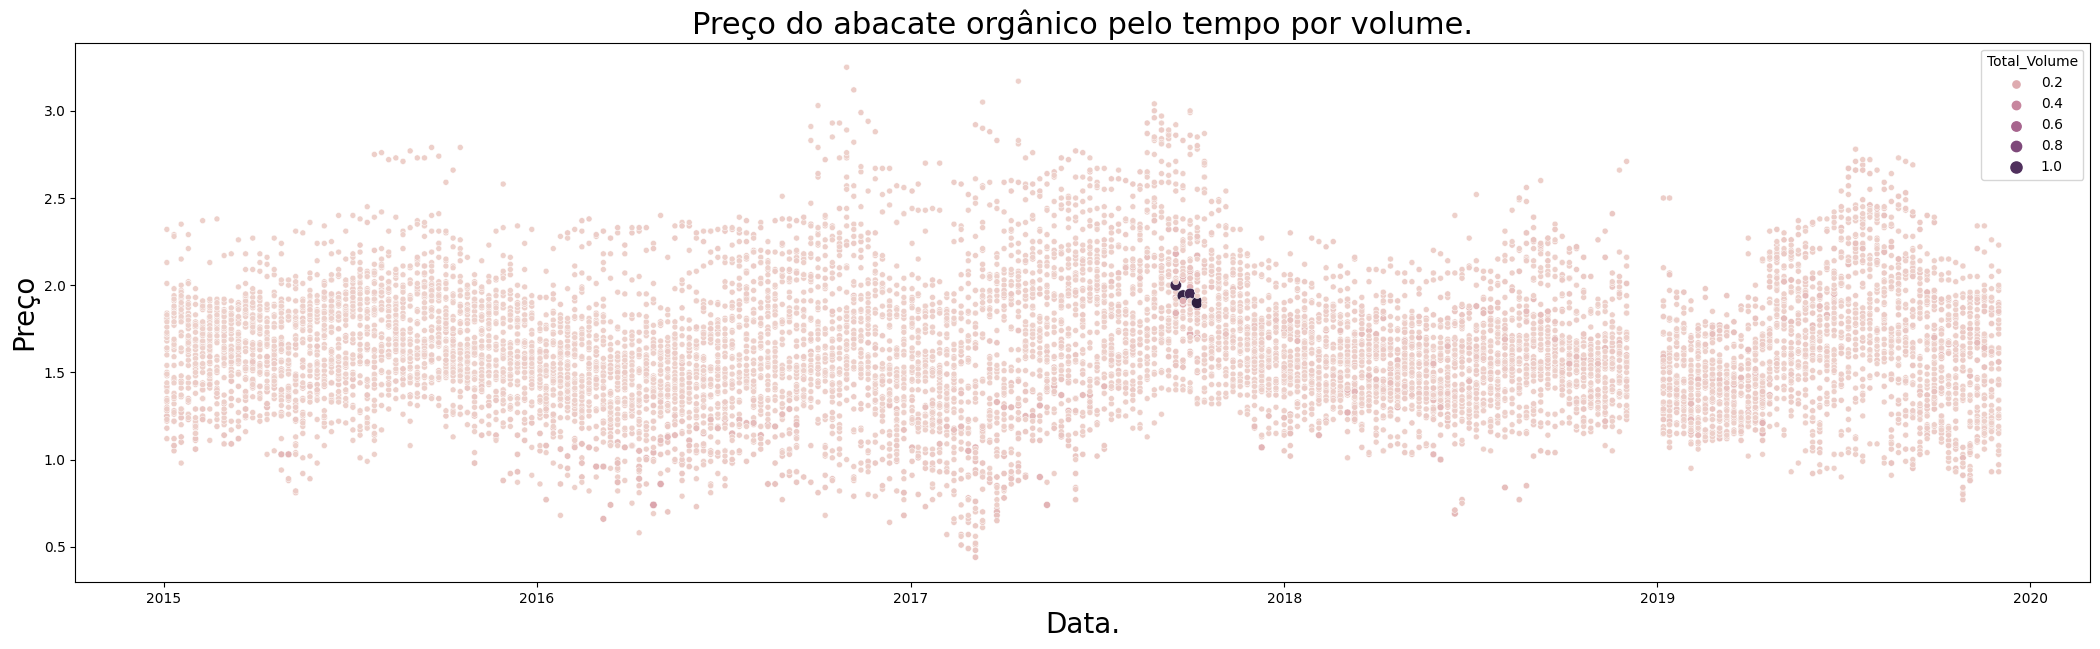

In [45]:
abacate_organico =df_avocados.type == "organic"
abacate_convencional = df_avocados.type == "conventional"


fig = plt.figure(figsize = (26, 7))

preco_organico = df_avocados.AveragePrice[abacate_organico]
volume_organico = df_avocados.Total_Volume[abacate_organico]
data_organico = df_avocados.Date[abacate_organico]

sns.scatterplot(x=data_organico, y=preco_organico, hue=volume_organico, size=volume_organico)

plt.xlabel("Data.", fontsize=20)
plt.ylabel("Preço", fontsize=20)
plt.title("Preço do abacate orgânico por ano e volume.", fontsize=22)
plt.show()

In [94]:
fig = plt.figure(figsize = (26, 7))

preco_convencional = df_avocados.AveragePrice[abacate_convencional]
volume_convencional  = df_avocados.Total_Volume[abacate_convencional]
data_convencional  = df_avocados.Date[abacate_convencional]

sns.scatterplot(x=data_convencional, y=preco_convencional, hue=volume_convencional, size=volume_convencional)

plt.xlabel("Data.", fontsize=20)
plt.ylabel("Preço", fontsize=20)
plt.title("Preço do abacate convencional por ano e volume.", fontsize=22)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Date'

<Figure size 2600x700 with 0 Axes>

Vizualizando os gráficos podemos observar duas momentos interesantes o primeiro tem haver com o preço elevado no período entre 2017 e 2018, com os gráficos vemos que existe um volume recorde de abacates vendido para o período analisado, isso explicaria o preço médio elevado para o período. E no segundo momento observamos um hiato de vendas para o período de 2019. Irei destrinchar esse hiato nas próximas perguntas.

### Contagem do tamanho dos anos.

In [68]:
grp_year = df_avocados.groupby('year').agg(total = ('year', 'count'))
grp_year

,total
year,
2015,4471
2016,4472
2017,4470
2018,4214
2019,4128


2019 é o ano que menos tem dados dos abacates, o que já foi evidenciado anteriormente. Infelizmente os metadados não explicam a falta desses dados, nem mesmo para 2018.

### Matriz de correlação.

In [82]:
df_avocados = df_avocados.drop(columns='Date')
df_avocados

,AveragePrice,Total_Volume,Small_Hass,Large_Hass,XLarge_Hass,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1.41,2604.25,220.61,23.64,0.00,2360.00,2360.00,0.00,0.0,organic,2015,NewOrleansMobile
2,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,44329.03,6468.53,0.0,conventional,2015,Charlotte
3,1.84,3966.00,244.34,2700.02,76.21,945.43,838.34,107.09,0.0,organic,2015,Nashville
4,1.82,2288.44,1438.04,53.73,0.00,796.67,796.67,0.00,0.0,organic,2015,MiamiFtLauderdale
...,...,...,...,...,...,...,...,...,...,...,...,...
21750,1.20,206981.00,81301.00,35823.00,1844.00,88013.00,74221.00,13695.00,97.0,conventional,2019,Charlotte
21751,1.56,84384.00,8866.00,2414.00,0.00,73104.00,72648.00,456.00,0.0,organic,2019,LosAngeles
21752,1.80,9482.00,1112.00,614.00,0.00,7755.00,7251.00,505.00,0.0,organic,2019,LasVegas
21753,1.15,88296.00,3121.00,70033.00,77.00,15065.00,7087.00,7212.00,766.0,conventional,2019,Albany


<AxesSubplot: >

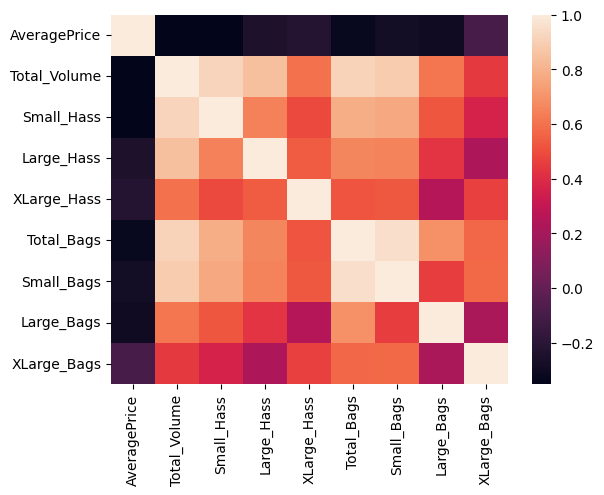

In [91]:
df_avocados_fatiado = df_avocados[df_avocados.columns[:9]]
correlation = df_avocados_fatiado.corr()

sns.heatmap(correlation)

### Conclusão.

Os dados utilizados possuem muitos outliea, por isso irei fazer um tratamento em cima dos outliers

In [92]:
#Identify the outliers for the price column
q1_price = df_avocados.Total_Volume.quantile(.25)
q3_price = df_avocados.Total_Volume.quantile(.75)
IQR_price = q3_price - q1_price

# Setting the limits
sup_price = q3_price + 1.5*IQR_price
inf_price = q1_price - 1.5*IQR_price

The dataset has 21755 columns,
And 21754 of theses entries are above 200,
Represent 100.00% the dataset.

Through the boxplot below, you can see how the data is dispersed: 


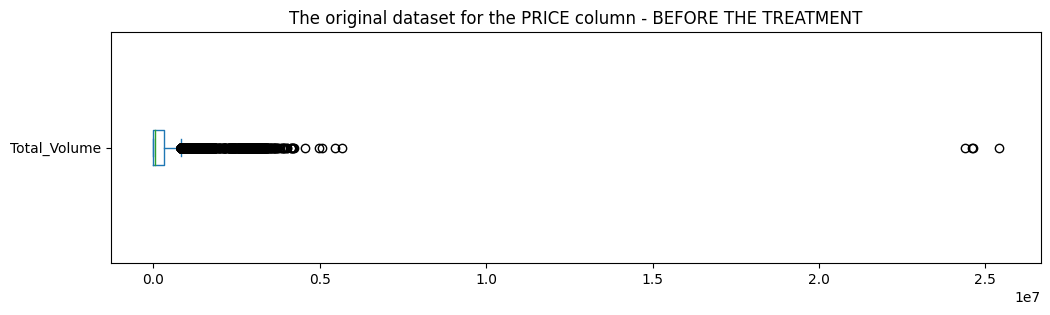

<Figure size 640x480 with 0 Axes>

In [93]:
# Checking the original dataset
print("The dataset has {} columns,".format(df_avocados.shape[0]))
print("And {} of theses entries are above 200,".format(len(df_avocados[df_avocados.Total_Volume > 200])))
print("Represent {:.2f}% the dataset.\n".format((len(df_avocados[df_avocados.Total_Volume > 200]) / df_avocados.shape[0])*100))
print("Through the boxplot below, you can see how the data is dispersed: ")

# Plot the boxplot
fig, ax = plt.subplots(figsize = (12,3))
df_avocados.Total_Volume.plot(kind = 'box', vert = False)
ax.set_title("The original dataset for the PRICE column - BEFORE THE TREATMENT")
plt.show()
plt.tight_layout()